<a href="https://colab.research.google.com/github/siddesai80/Machine-Learning/blob/main/Drug_Classification_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# Checking the python version
!python --version

Python 3.8.16


### Importing necessary libraries and setting styling options


In [56]:
# data
import pandas as pd
import numpy as np

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
colors = ['#494BD3', '#C0FF3E', '#FF8000', '#F08080', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']

# pre-processing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

### Reading the CSV file

In [57]:
# Reading the CSV file
df = pd.read_csv('/content/drug200.csv')

In [58]:
# Checking if the data got imported as expected
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Exploratory Data Analysis

In [59]:
# Checking the basic information of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [60]:
# Printing all the column names
print(df.columns)

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [61]:
# Printing the data types of all the 
print(df.dtypes)

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object


In [62]:
# Checking if there are any null values in the dataset
print(df.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [63]:
# Describing the dataset
print(df.describe())

              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


In [64]:
# Data Correlation: Relationship between columns
df.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


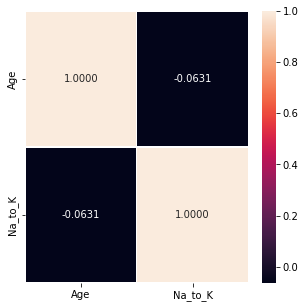

In [65]:
# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(df.corr(), annot = True, linewidths=0.5, linecolor = "white", fmt = ".4f", ax = ax)
plt.show()

In [66]:
df['New_Ages'] = pd.cut(df['Age'], [0,25,45,df['Age'].max()], labels=['Young', 'Middle Age', 'Senior Citizen'])

df['BP'].replace({'LOW': 0, 'NORMAL': 1, 'HIGH': 2}, inplace=True)
df['Cholesterol'].replace({'NORMAL': 0, 'HIGH': 1}, inplace=True)

df.loc[(df['Na_to_K'] < 29) & (df['Na_to_K'] > 24.5), 'New_Na_to_K'] = 'Good Na/K'
df.loc[(df['Na_to_K'] > 29) | (df['Na_to_K'] < 24.5),'New_Na_to_K'] = 'Bad Na/K'

In [67]:
cat_cols = ['Sex', 'BP', 'Cholesterol', 'Drug', 'New_Ages', 'New_Na_to_K']

In [68]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Bar Graph', 'Pie-Chart'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color='grey',
                                     line=dict(color='#000000',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors,line=dict(color='#000000',
                                               width=1))),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)
    
for col in cat_cols:
    cat_summary_with_graph(df,col)

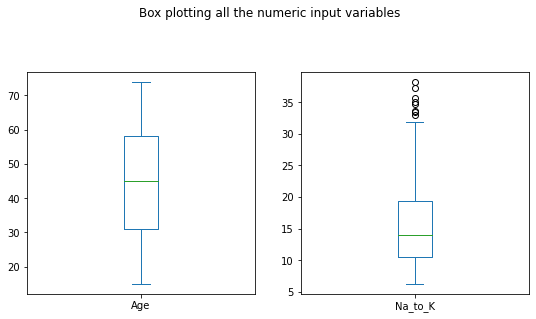

In [69]:
#Plotting boxplot for numeric variables
df[['Age','Na_to_K']].plot(kind='box', subplots=True, layout=(2,2),figsize=(9,9),title='Box plotting all the numeric input variables')
plt.show()

# Data Pre-Processing

In [70]:
# Reading the CSV file again in a new dataframe
dataframe = pd.read_csv('/content/drug200.csv')

In [71]:
# Checking if the data got imported as expected
dataframe

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [72]:
# Label encoding categorical features

def label_encoder(x):
    le = LabelEncoder()
    dataframe[x] = le.fit_transform(dataframe[x])

categ = ["Sex","BP","Cholesterol","Drug"]

for l in categ:
    label_encoder(l)

In [73]:
# Checking if the categorical features are converted into numeric features
dataframe

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [74]:
# Splitting the dataframe in train and test data 

X = dataframe.drop('Drug', axis = 1)
Y = dataframe['Drug']

x_train, x_test, y_train, y_test = train_test_split( X, Y, random_state=0)

In [75]:
# Printing shape for our data

print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (150, 5)
x_test (50, 5)
y_train (150,)
y_test (50,)


In [76]:
# Scaling the data

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Decision Tree

In [77]:
# Training Decision Tree

clf = DecisionTreeClassifier().fit(x_train, y_train)

print('Accuracy of Decision Tree classifier: ', round((clf.score(x_test, y_test)),2))

Accuracy of Decision Tree classifier:  1.0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



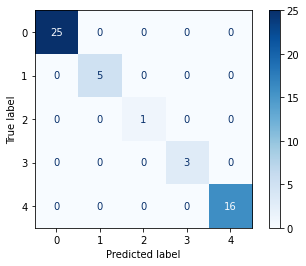

<Figure size 1080x1080 with 0 Axes>

In [78]:
# Plotting Confusion Matrix

plot_confusion_matrix(clf, x_test, y_test, cmap=plt.cm.Blues)  
plt.figure(figsize = (15, 15))
plt.show()

In [79]:
# Generating classification report

y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



### K Nearest Neighbor

In [80]:
# Training K Nearest Neighbor

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier: ', round((knn.score(x_test, y_test)),2))

Accuracy of K-NN classifier:  0.7


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



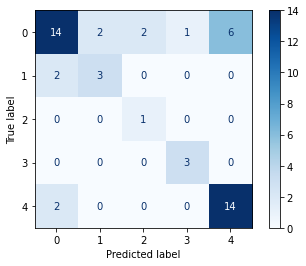

<Figure size 1080x1080 with 0 Axes>

In [81]:
# Plotting Confusion Matrix

plot_confusion_matrix(knn, x_test, y_test, cmap=plt.cm.Blues)  
plt.figure(figsize = (15, 15))
plt.show()

In [82]:
# Generating classification report

y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.56      0.65        25
           1       0.60      0.60      0.60         5
           2       0.33      1.00      0.50         1
           3       0.75      1.00      0.86         3
           4       0.70      0.88      0.78        16

    accuracy                           0.70        50
   macro avg       0.63      0.81      0.68        50
weighted avg       0.72      0.70      0.70        50



### Logistic Regression

In [83]:
# Training Logistic Regression

LR = LogisticRegression()
LR.fit(x_train, y_train)
print('Accuracy of Logistic Regression classifier: ', round((LR.score(x_test, y_test)),2))

Accuracy of Logistic Regression classifier:  0.82


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



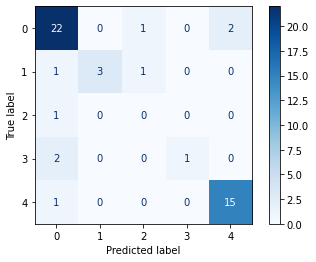

<Figure size 1080x1080 with 0 Axes>

In [84]:
# Plotting Confusion Matrix

plot_confusion_matrix(LR, x_test, y_test, cmap=plt.cm.Blues)  
plt.figure(figsize = (15, 15))
plt.show()

In [85]:
# Generating classification report

y_pred = LR.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         1
           3       1.00      0.33      0.50         3
           4       0.88      0.94      0.91        16

    accuracy                           0.82        50
   macro avg       0.74      0.55      0.60        50
weighted avg       0.85      0.82      0.82        50

